# Insights for Restaurants Using Yelp Data

**About the data:**
This data was obtained from Kaggle, courtesy of Yelp. It includes information on 174,000 businesses globally and spans from business attributes to checkins and reviews.

**Project Outline:**

I. Data Cleansing
    
    A. Drop columns, merge datasets
    B. Create new dummies, fill in NAs

II. Overview of Businesses on Yelp
    
    A. General trends of business attributes, categories, locations, and user activity

III. Yelp Data Analytics for Restaurants 
    
    A. What are the most important business attributes for a restaurant?
    B. Which geographic areas have the most competition? What are some good "role model" restaurants?
    C. Providing business insight for a specific international chain restaurant
    
IV. How People Use Yelp
    
    A. Small-scale qualitative research with word clouds
    B. Sentiment analysis using user tips
    C. Attributes of top users

In [157]:
#import modules:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import sys
#reload(sys)
#sys.setdefaultencoding('utf8')

In [158]:
bus = pd.read_csv("yelp_business.csv")

bus_att = pd.read_csv("yelp_business_attributes.csv")

**Overview of the data:**

In [159]:
bus.info()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...


In [ ]:
bus_att.info()

# Part I: Data Cleansing
1. drop unwanted columns

2. convert columns to dummies

3. merge datasets to create master dataframe

1. Remove some unnecessary columns from Dataset1:

In [161]:
bus.drop(['neighborhood','address'],axis=1,inplace=True)

In [162]:
bus.info()

### Cleaning the bus_att dataframe:

We can do the following to clean up the data:

1. remove some of these columns

2. make one dummy out of the columns which are similar


In [163]:
#Dropping columns having mostly NA Values

bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='HairSpecializesIn')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='Music')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='Ambience')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BYOB')))]


bus_att.drop(["AcceptsInsurance", "CoatCheck",  "Smoking","DriveThru", "GoodForDancing",  \
              "Corkage", "ByAppointmentOnly","RestaurantsPriceRange2",\
              "HasTV","NoiseLevel","RestaurantsAttire","WiFi","RestaurantsTakeOut","OutdoorSeating",\
             "RestaurantsDelivery","BusinessAcceptsBitcoin","AgesAllowed","RestaurantsCounterService","RestaurantsGoodForGroups"], axis=1,inplace=True)

In [164]:
bus_att.columns = [c.replace('-', '_') for c in bus_att.columns]

In [165]:
###Creating Parking Dummy
bus_att.loc[(bus_att.BusinessParking_garage=='True')|(bus_att.BusinessParking_street=='True')|\
        (bus_att.BusinessParking_validated=='True')|(bus_att.BusinessParking_lot=='True')|\
        (bus_att.BusinessParking_valet=='True'),'Parking'] = 1
bus_att.loc[(bus_att.Parking!=1)&((bus_att.BusinessParking_garage=='False')|(bus_att.BusinessParking_street=='False')\
                          |(bus_att.BusinessParking_validated=='False')|(bus_att.BusinessParking_lot=='False')|\
                          (bus_att.BusinessParking_valet=='False')),'Parking'] = 0
bus_att.loc[((bus_att.BusinessParking_garage == 'Na')&(bus_att.BusinessParking_street == 'Na')&\
         (bus_att.BusinessParking_validated == 'Na')&(bus_att.BusinessParking_lot == 'Na')&\
         (bus_att.BusinessParking_valet == 'Na')),'Parking'] = 'Na'

In [166]:
##deleting the columns for which combined dummy columns has been created above
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BusinessParking')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='BestNights')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='GoodForMeal')))]
bus_att = bus_att[bus_att.columns.drop(list(bus_att.filter(regex='DietaryRestrictions')))]

In [167]:
#Transform TRUE FALSE variables to 0 and 1s and create dummies:

bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'True', 'BusinessAcceptsCreditCards'] = 1
bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'False', 'BusinessAcceptsCreditCards'] = 0
bus_att.loc[bus_att.BusinessAcceptsCreditCards == 'Na', 'BusinessAcceptsCreditCards'] = 'NaN'

bus_att.loc[bus_att.GoodForKids == '1', 'GoodForKids'] = 0
bus_att.loc[bus_att.GoodForKids == '2', 'GoodForKids'] = 0
bus_att.loc[bus_att.GoodForKids == '3', 'GoodForKids'] = 1
bus_att.loc[bus_att.GoodForKids == '4', 'GoodForKids'] = 1
bus_att.loc[bus_att.GoodForKids == 'Na', 'GoodForKids'] = 'Na'

bus_att.loc[bus_att.WheelchairAccessible == 'True', 'WheelchairAccessible'] = 1
bus_att.loc[bus_att.WheelchairAccessible == 'False', 'WheelchairAccessible'] = 0
bus_att.loc[bus_att.WheelchairAccessible == 'Na', 'WheelchairAccessible'] = 'NaN'

bus_att.loc[bus_att.BikeParking == 'True', 'BikeParking'] = 1
bus_att.loc[bus_att.BikeParking == 'False', 'BikeParking'] = 0
bus_att.loc[bus_att.BikeParking == 'Na', 'BikeParking'] = 'NaN'

bus_att.loc[bus_att.Alcohol == 'True', 'Alcohol'] = 1
bus_att.loc[bus_att.Alcohol == 'False', 'Alcohol'] = 0
bus_att.loc[bus_att.Alcohol == 'Na', 'Alcohol'] = 'NaN'


bus_att.loc[bus_att.Caters == 'True', 'Caters'] = 1
bus_att.loc[bus_att.Caters == 'False', 'Caters'] = 0
bus_att.loc[bus_att.Caters == 'Na', 'Caters'] = 'NaN'

bus_att.loc[bus_att.RestaurantsReservations == 'True', 'RestaurantsReservations'] = 1
bus_att.loc[bus_att.RestaurantsReservations == 'False', 'RestaurantsReservations'] = 0
bus_att.loc[bus_att.RestaurantsReservations == 'Na', 'RestaurantsReservations'] = 'NaN'

bus_att.loc[bus_att.HappyHour == 'True', 'HappyHour'] = 1
bus_att.loc[bus_att.HappyHour == 'False', 'HappyHour'] = 0
bus_att.loc[bus_att.HappyHour == 'Na', 'HappyHour'] = 'NaN'

bus_att.loc[bus_att.RestaurantsTableService == 'True', 'RestaurantsTableService'] = 1
bus_att.loc[bus_att.RestaurantsTableService == 'False', 'RestaurantsTableService'] = 0
bus_att.loc[bus_att.RestaurantsTableService == 'Na', 'RestaurantsTableService'] = 'NaN'

bus_att.loc[bus_att.DogsAllowed == 'True', 'DogsAllowed'] = 1
bus_att.loc[bus_att.DogsAllowed == 'False', 'DogsAllowed'] = 0
bus_att.loc[bus_att.DogsAllowed == 'Na', 'DogsAllowed'] = 'NaN'


bus_att.loc[bus_att.Open24Hours == 'True', 'Open24Hours'] = 1
bus_att.loc[bus_att.Open24Hours == 'False', 'Open24Hours'] = 0
bus_att.loc[bus_att.Open24Hours == 'Na', 'Open24Hours'] = 'NaN'

Now we can merge datasets 1 and 2 together on the common column "business_id".

In [168]:
##merging dataset
mdf= bus.merge(bus_att, left_on = "business_id", right_on = "business_id")
len(mdf)

152041

In [169]:
mdf.info()

### More cleaning using master df

In [170]:
##Creating Dummy for Stars

mdf.loc[mdf.stars > 3.5, 'stars_dum'] = 1
mdf.loc[mdf.stars <= 3.5, 'stars_dum'] = 0

In [171]:
##Getting general categories: ???
# Creating Restaurant_only dummy column

mdf['Restaurants'] = mdf['categories'].str.contains("Restaurants")

mdf.loc[mdf.Restaurants == True, 'Restaurants_dum'] = 1
mdf.loc[mdf.Restaurants == False, 'Restaurants_dum'] = 0

In [172]:
# Creating Health dummy column 
mdf['Health'] = mdf['categories'].str.contains("Health & Medical")

mdf.loc[mdf.Health == True, 'Health_dum'] = 1
mdf.loc[mdf.Health == False, 'Health_dum'] = 0

In [173]:
# Creating Shopping dummy column
mdf['Shopping'] = mdf['categories'].str.contains("Shopping")

mdf.loc[mdf.Shopping == True, 'Shopping_dum'] = 1
mdf.loc[mdf.Shopping == False, 'Shopping_dum'] = 0

In [174]:
# Creating Beauty dummy column
mdf['Beauty'] = mdf['categories'].str.contains("Beauty & Spas")

mdf.loc[mdf.Beauty == True, 'Beauty_dum'] = 1
mdf.loc[mdf.Beauty == False, 'Beauty_dum'] = 0

In [175]:
# Creating Nightlife dummy column
mdf['Nightlife'] = mdf['categories'].str.contains("Nightlife")

mdf.loc[mdf.Nightlife == True, 'Nightlife_dum'] = 1
mdf.loc[mdf.Nightlife == False, 'Nightlife_dum'] = 0

In [176]:
##drop boolean columns:

mdf.drop(['Restaurants', 'Health', 'Shopping', 'Nightlife', 'Beauty', 'categories'], axis=1).head(2)

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,RestaurantsTableService,DogsAllowed,Open24Hours,Parking,stars_dum,Restaurants_dum,Health_dum,Shopping_dum,Beauty_dum,Nightlife_dum
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,...,NaN,NaN,NaN,1,1.0,0.0,1.0,0.0,0.0,0.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,...,NaN,NaN,NaN,Na,0.0,0.0,0.0,0.0,1.0,0.0


### Fill in the na's
Some columns were dropped because they had too many NA's to be useful. For the rest, the NA's were filled in using the median of the corresponding column.

In [177]:
# Fill in BusinessAcceptsCreditCards column's na values with it's median value
mdf['BusinessAcceptsCreditCards'].median()
mdf['BusinessAcceptsCreditCards'] = mdf['BusinessAcceptsCreditCards'].replace('NaN', 0)
mdf['BusinessAcceptsCreditCards'].unique()

0.0

array([0, 1], dtype=int64)

In [178]:
# Fill in Open24Hours column's na values with it's median value
mdf['Open24Hours'].median()
mdf['Open24Hours'] = mdf['Open24Hours'].replace('NaN', 0)
mdf['Open24Hours'].unique()

0.0

array([0, 1], dtype=int64)

In [179]:
# Fill in BikeParking column's na values with it's median value
mdf['BikeParking'].median()
mdf['BikeParking'] = mdf['BikeParking'].replace('NaN', 1)
mdf['BikeParking'].unique()

1.0

array([1, 0], dtype=int64)

In [180]:
# Fill in Alcohol column's na values with it's median value
mdf['Alcohol'].median()
mdf['Alcohol'] = mdf['Alcohol'].replace('NaN', 1)
mdf['Alcohol'].unique()

1.0

array([1, 0], dtype=int64)

In [181]:
# Fill in DogsAllowed column's na values with it's median value
mdf['DogsAllowed'].median()
mdf['DogsAllowed'] = mdf['DogsAllowed'].replace('NaN', 0)
mdf['DogsAllowed'].unique()

0.0

array([0, 1], dtype=int64)

In [182]:
mdf['Parking'].unique()
mdf.loc[mdf.Parking == 'Na', 'Parking'] = 'NaN'

array([1.0, 'Na', 0.0], dtype=object)

In [183]:
# Fill in Parking column's na values with it's median value, then turning it into integer to get rid of the dot 
mdf['Parking'].median()
mdf['Parking'] = mdf['Parking'].replace('NaN', 1)
mdf['Parking'] = (mdf['Parking']).astype(int)
mdf['Parking'].unique()

1.0

array([1, 0], dtype=int64)

## Part II: Overview of Businesses on Yelp



In [184]:
#get the counts of each business category:
mdf['categories'] = mdf.categories.str.partition(';')

x=mdf.categories.value_counts()
x10 = x.head(10)   #because we just want to plot the 10 most popular categories


#convert back to dataframe so we can use seaborn later:
x10 = x10.to_frame(name = 'count')

#reset the index to convert categories to a column:
x10.reset_index(level=0, inplace=True)

x10.columns = ['Category', 'Count']
x10

,Category,Count
0,Restaurants,17332
1,Food,6882
2,Shopping,6701
3,Beauty & Spas,5134
4,Home Services,3883
5,Health & Medical,3540
6,Nightlife,2608
7,Local Services,2497
8,Automotive,2367
9,Bars,2147


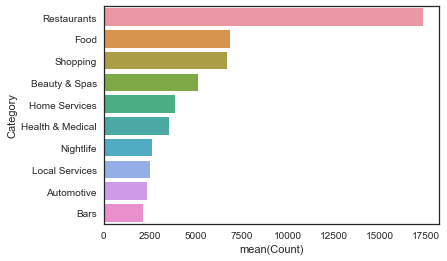

In [185]:
sns.barplot(y = "Category", x = "Count", data = x10)

Unsurprisingly, there are far more restaurants on Yelp than any other business type.  **Note:** The above method of getting categories is not the most accurate, since it only takes the first entry in the "categories" column and discards all the rest.  The following is a better method, using the category dummies created earlier. We will use this to get the total reviews for each of the top categories:

3214770

377478

172519

875322

315099

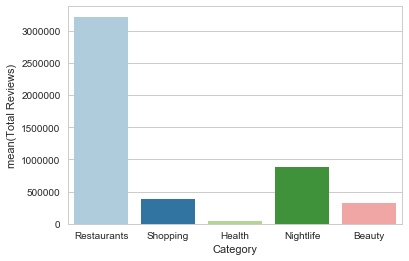

In [186]:
#get category counts using category dummies
mdf[mdf['Restaurants_dum'] == 1]["review_count"].sum()
mdf[mdf['Shopping_dum'] == 1]["review_count"].sum()
mdf[mdf['Health_dum'] == 1]["review_count"].sum()
mdf[mdf['Nightlife_dum'] == 1]["review_count"].sum()
mdf[mdf['Beauty_dum'] == 1]["review_count"].sum()

#create a small df with these numbers:
col1 = ["Restaurants", "Shopping", "Health", "Nightlife", "Beauty"]
col2 = [3214770, 377478, 39487, 875322, 315099]

mx = np.column_stack((col1, col2))

rev_count = pd.DataFrame(mx)
rev_count.columns = ["Category", "Total Reviews"]
rev_count["Total Reviews"] = pd.to_numeric(rev_count["Total Reviews"])

sns.set_style("whitegrid")
sns.barplot(y = "Total Reviews", x = "Category", data = rev_count, palette = "Paired")

Again, the total reviews for restaurants is far greater than for all other categories, and the difference is even more pronounced for reviews than for number of businesses per category. This suggests that Yelp users may simply prefer reviewing restaurants more than other types of businesses.

Let's look at the average number of reviews and and average ratings for each of these top 10 categories, split between restaurants and non-restaurants so we can compare.

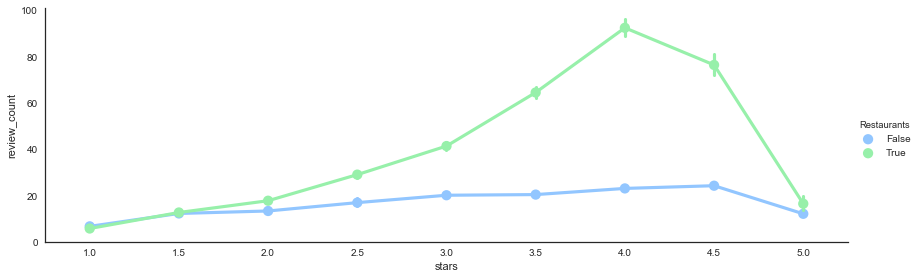

In [187]:
sns.set_style("white")

sns.factorplot(x='stars',y='review_count',hue='Restaurants',data=mdf, palette = "pastel",
              aspect =3)


This line graph validates the finding in the previous bar graph. Additionally, it shows that people tend to give a higher proportion of 4 and 5 star reviews for restaurants compared to non-restaurants, suggesting that reviewers are enthusiastic in reviewing restaurants they enjoyed dining at, but not so enthusiastic in reviewing other types of businesses.

**Average rating for each major business category:**

In [188]:
##Average ratings (number of stars) for each category of interest:

mdf[mdf['Beauty_dum'] == 1]["stars"].mean()

mdf[mdf['Health_dum'] == 1]["stars"].mean()

mdf[mdf['Shopping_dum'] == 1]["stars"].mean()

mdf[mdf['Restaurants_dum'] == 1]["stars"].mean()

mdf[mdf['Nightlife_dum'] == 1]["stars"].mean()

3.9546757762459586

3.8617270869598124

3.672145755128351

3.4613381297659864

3.5417263157894738

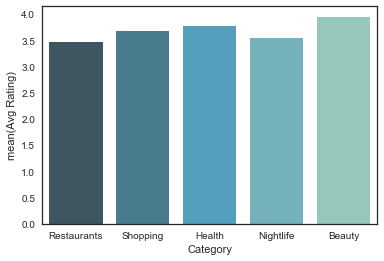

In [189]:
##Create small df for average ratings by category:

col3 = ["Restaurants", "Shopping", "Health", "Nightlife", "Beauty"]

col4 = [3.46, 3.67, 3.77, 3.54, 3.95]

mx2 = np.column_stack((col3, col4))

avg_rating = pd.DataFrame(mx2)

avg_rating.columns = ["Category", "Avg Rating"]

avg_rating["Avg Rating"] = pd.to_numeric(avg_rating["Avg Rating"])

sns.barplot(y = "Avg Rating", x = "Category", data = avg_rating, palette = "GnBu_d")

The above finding is quite interesting, especially when we compare it to the plot of total review counts by category. We find that **Restaurants has the lowest average rating**, even though it has the most number of reviews by far. Perhaps Yelp reviewers have higher expectations for restaurants and care more about their dining experiences.

**Overall trends between the different variables:**

We can create a correlation matrix and apply a heatmap to easily visualize trends.

In [190]:
corr = mdf.corr()

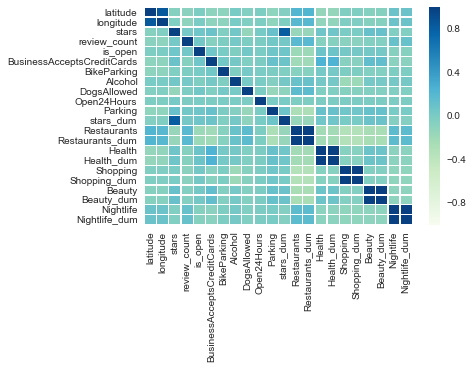

In [191]:
sns.heatmap(corr, annot = False, cmap = "GnBu", linewidths = 0.3)

Here we see several positive correlations (blue):

    Restaurants and review count
    Stars and Accepts Credit Cards
    Restaurants and Dogs Allowed
    Health-related business and Accepts Credit Cards

And also some negative correlations (yellow-green):

    Shopping and Restaurants
    Restaurants and Parking -- this one is surprising! Perhaps many restaurants are in metropolitan areas where there's limited parking.
    
These correlations may provide insight to a business on the types of attributes that competitors (such as other restaurants) are offering.
    

**Locations of Yelp businesses**

By city:

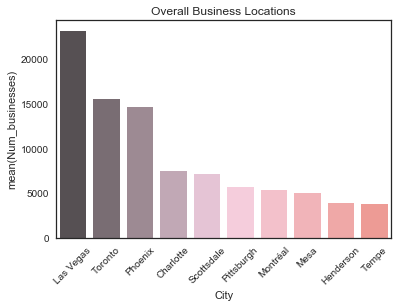

In [192]:
#get the top 10 cities with most number of businesses:
cities = mdf.groupby("city")["business_id"].count().sort_values(ascending = False).head(10)

city = cities.index
num_businesses = cities.get_values()

#convert matrix to df:
mx1 = np.column_stack((city, num_businesses))
cities10 = pd.DataFrame(mx1)
cities10.columns = ["City", "Num_businesses"]


p = sns.barplot(y = "Num_businesses", x = "City", data = cities10, palette = "Set3_d")

p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title('Overall Business Locations')

In [193]:
#create df with restaurants only:
mdfr = mdf[mdf['Restaurants_dum'] == 1]
mdfr.head(5)


,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,Restaurants,Restaurants_dum,Health,Health_dum,Shopping,Shopping_dum,Beauty,Beauty_dum,Nightlife,Nightlife_dum
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,...,True,1.0,False,0.0,False,0.0,False,0.0,True,1.0
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,...,True,1.0,False,0.0,False,0.0,False,0.0,False,0.0
9,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,...,True,1.0,False,0.0,False,0.0,False,0.0,False,0.0
13,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Charlotte,NC,28202,35.221647,-80.839345,3.5,7,1,...,True,1.0,False,0.0,False,0.0,False,0.0,False,0.0
14,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,...,True,1.0,False,0.0,False,0.0,False,0.0,False,0.0


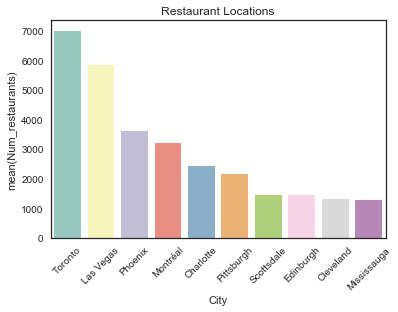

In [194]:
#create df with restaurants only:
mdfr = mdf[mdf['Restaurants_dum'] == 1]

#get the top 10 cities with most number of restaurants:
cities = mdfr.groupby("city")["business_id"].count().sort_values(ascending = False).head(10)

city = cities.index
num_rest = cities.get_values()

#convert matrix to df:
mx2 = np.column_stack((city, num_rest))
cities10 = pd.DataFrame(mx2)
cities10.columns = ["City", "Num_restaurants"]


p = sns.barplot(y = "Num_restaurants", x = "City", data = cities10, palette = "Set3")

p.set_xticklabels(p.get_xticklabels(), rotation=45)
p.set_title('Restaurant Locations')

Las Vegas, Toronto, and Phoenix have the greatest number of both total businesses and restaurants. These are also all major metropolitan cities so that makes sense.  Interestingly, Toronto has more restaurants than Vegas, but Vegas has more total businesses.  This suggests that Vegas has a more diverse range of businesses. It's important to note that this dataset only covers some, not nearly all, of the metropolitan areas in the selected countries. That's why cities like SF and New York are not included.

# Part III: Yelp Data Analytics for Restaurants

**In this section, the analysis will focus on restaurants only since the majority of businesses in the data are restaurants.**

**Distribution of restaurants by rating:**

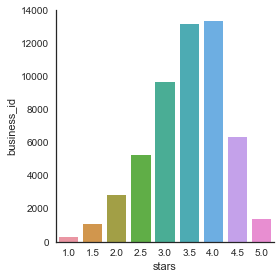

In [195]:
gbstar= mdfr.groupby(['stars'], as_index=False).agg({'business_id':'count'})

sns.factorplot(x='stars', y='business_id', data=gbstar, kind='bar')

**Results:**

1. From the plot you can see that number of review counts is highest for restaurants with 4 stars, and the distribution among ratings is skewed right.

2. The numbers drop dramatically from 4 stars to 4.5, and from 4.5 to 5. So that means it's relatively easy to satisfy a customer (3.5-4 stars), but difficult to really impress them!

3. The review and ratings distribution graphs suggest that perhaps people tend to review restaurants that they were more satisfied with.  However, more investigation is needed to determine whether its the number of reviews/popularity of a place that is causing higher ratings, or the other way around.


**Most popular restaurants and their locations:**

In [196]:
#mdfr[["business_id", "name", "city", "review_count"]].groupby("business_id").sum()

gbr = mdfr[["business_id", "city", "review_count"]].groupby("business_id", as_index = False)[['review_count']].sum().nlargest(20, "review_count")

#now we want the actual names and their locations:
gbr2 = gbr.merge(mdfr[["business_id", "name", "city"]], left_on = "business_id", right_on = "business_id")

gbr2

,business_id,review_count,name,city
0,4JNXUYY8wbaaDmk3BPzlWw,7361,"""Mon Ami Gabi""",Las Vegas
1,RESDUcs7fIiihp38-d6_6g,7009,"""Bacchanal Buffet""",Las Vegas
2,K7lWdNUhCbcnEvI0NhGewg,5950,"""Wicked Spoon""",Las Vegas
3,cYwJA2A6I12KNkm2rtXd5g,5447,"""Gordon Ramsay BurGR""",Las Vegas
4,DkYS3arLOhA8si5uUEmHOw,4869,"""Earl of Sandwich""",Las Vegas
5,f4x1YBxkLrZg652xt2KR5g,4774,"""Hash House A Go Go""",Las Vegas
6,2weQS-RnoOBhb1KsHKyoSQ,4018,"""The Buffet""",Las Vegas
7,KskYqH1Bi7Z_61pH6Om8pg,3964,"""Lotus of Siam""",Las Vegas
8,eoHdUeQDNgQ6WYEnP2aiRw,3910,"""Serendipity 3""",Las Vegas
9,ujHiaprwCQ5ewziu0Vi9rw,3838,"""The Buffet at Bellagio""",Las Vegas


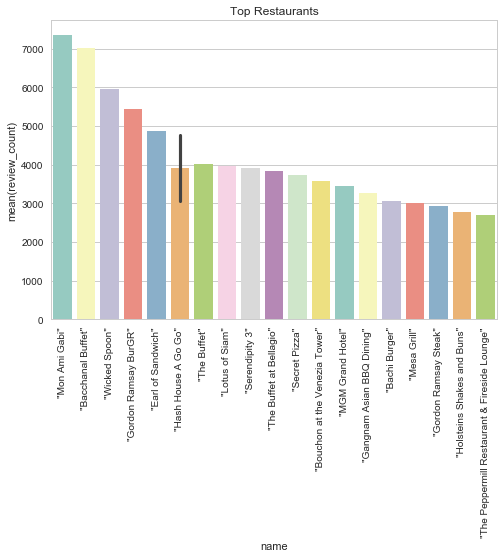

In [197]:
#Visualize the above results:
sns.set(style="whitegrid")

b = sns.barplot(y = "review_count", x = "name", data = gbr2, palette = "Set3")

b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.set_title('Top Restaurants')



**Which chain restaurants have the most locations?**

In [198]:
mdfrg = mdfr.groupby("name").agg({"business_id": "count"})

mdfrg.reset_index(level = 0, inplace = True)

mdfrg.nlargest(10, "business_id")

,name,business_id
20137,"""McDonald's""",671
30413,"""Subway""",650
24927,"""Pizza Hut""",296
31221,"""Taco Bell""",285
4554,"""Burger King""",282
36041,"""Wendy's""",251
8947,"""Domino's Pizza""",203
6768,"""Chipotle Mexican Grill""",175
15742,"""KFC""",158
23495,"""Panera Bread""",155


Let's choose Panera Bread to do further analysis on, since it's not a fast food place like the other top chain places. How popular is Panera Bread in the US vs. outside the US?

In [199]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

US_states=set(states).intersection(mdfr.state)

mdfr['US'] = mdfr.state.isin(US_states).astype(int)
mdfr['Panera']=mdfr['name'].str.contains('Panera').astype(int)

mdfr.head(3)

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,is_open,...,Health,Health_dum,Shopping,Shopping_dum,Beauty,Beauty_dum,Nightlife,Nightlife_dum,US,Panera
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,...,False,0.0,False,0.0,False,0.0,True,1.0,1,0
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,...,False,0.0,False,0.0,False,0.0,False,0.0,0,0
9,XOSRcvtaKc_Q5H1SAzN20A,"""East Coast Coffee""",Houston,PA,15342,40.241548,-80.212815,4.5,3,0,...,False,0.0,False,0.0,False,0.0,False,0.0,1,0


In [200]:
p_mdfr = mdfr[mdfr['Panera']==1]
len(p_mdfr)

157

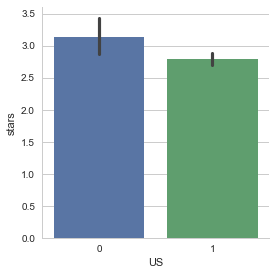

In [201]:
sns.factorplot(x='US', y = "stars", kind='bar', data=p_mdfr,
              aspect =1)

In [202]:
#Get number of Panera Bread locations in vs. outside the US:

print "In the US: " + str(len(p_mdfr[p_mdfr['US']==1]))
print "Outside the US: " + str(len(p_mdfr[p_mdfr['US']==0]))

The bar graph above shows that Panera Bread has worse average ratings within the US.  However, the Panera Bread data is very unbalanced since most locations are within the US, leading to biased results. Either way, we can see that the average rating in the US is very low, below 3 stars, **so one recommendation would be to improve either the food or customer experience in US locations.**  Further analysis can be done to determine what is actually causing these poor ratings.

**For more information, merged two more datasets to the master df: yelp_checkin and yelp_tip**

Yelp _checkin data_ has number of checkins in each day of the week. Yelp _tip data_ has mainly tip comments of different users for business ids.

For yelp_checkin, each row represents a business, whereas the columns report:

    business_id: unique business_id
    weekday: day of the week
    hour: time of the day
    checkins: number of checkin each day

For yelp_checkin, each row represents a business, whereas the columns report:

    text: tip comment
    date
    likes: number of likes
    business_id: unique business_id
    user_id: unique business_id

In [203]:
checkin = pd.read_csv("yelp_checkin.csv")

checkin.head(3)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1


In [204]:

#Get the total number of checkins for each business: 
checkin1=checkin.groupby(['business_id'],as_index=False)['checkins'].sum()

#mdf2[["business_id", "name", "checkins", "city"]].nlargest(10, "checkins")
#Surprisingly, it's mostly airports and fancy hotels that get the most checkins!  
#This suggests that Yelp users use each feature (checkins vs. reviewing) for very different purposes.'''

Which are the peak days for the top restaurant in the dataset, Mon Ami Gabi?

In [205]:
mgb = checkin[checkin["business_id"] == "4JNXUYY8wbaaDmk3BPzlWw"].groupby("weekday").agg({"checkins": "sum"})
mgb

,checkins
weekday,
Fri,2421
Mon,2590
Sat,4330
Sun,4821
Thu,1728
Tue,1684
Wed,1564


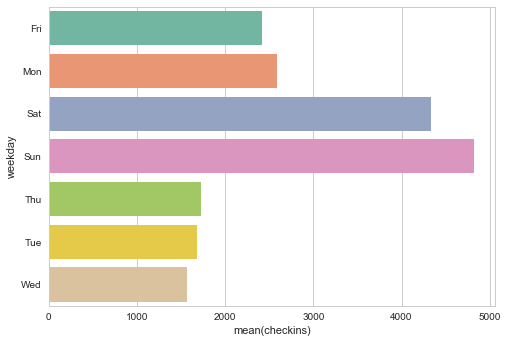

In [206]:
#visualize the above:
mgb.reset_index(level=0, inplace=True)

sns.barplot(x = "checkins", y = "weekday", data = mgb, palette = "Set2")



**Create a weekly timetable of checkins for Mon Ami Gabi:**

In [207]:
dft =checkin.groupby(['weekday','hour'])['checkins'].sum()
dft =dft.reset_index()
dft =dft.pivot(index='hour',columns='weekday')[['checkins']]
dft.columns = dft.columns.droplevel()
dft =dft.reset_index()

In [208]:
dft['hour']=dft['hour'].apply(lambda x: str(x).split(':')[0])
dft['hour']=dft['hour'].astype(int)
# Sort by hour:
dft =dft.sort_values('hour')
dft =dft[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


dft.style.apply(highlight_max, axis=0)

weekday,hour,Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0,163336,156195,166254,171669,178666,224425,225209
11,1,161168,162632,174696,181712,190371,245453,235295
16,2,140252,141732,153923,160906,169989,236195,224716
17,3,106422,103584,111840,117639,127783,189242,184979
18,4,73497,68950,72821,76283,86825,138952,140092
19,5,48253,42977,44109,42130,55672,97062,101133
20,6,31624,26646,27175,27108,36546,68465,72404
21,7,23022,18946,19195,20672,26551,49633,52890
22,8,15327,12452,12484,13830,18004,33591,35079
23,9,11000,8837,8814,10058,12683,21969,21524


Visualize the checkin trends for Saturday using the table above:

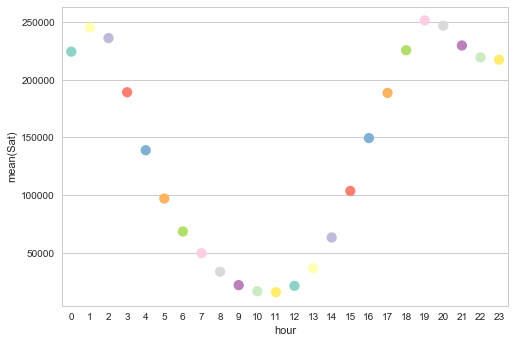

In [209]:
#plt.ylabel("Checkins in Sat")
sns.pointplot(x = "hour", y = "Sat", data = dft, join = True, color = "orange")

## Sentiment Analysis of the tips for Bacchanal Buffet:

Using another top restaurant, let's run a sentiment analysis. This will give the business owner an idea of the overall reactions to the restaurant and top areas of strength and weaknesses.

In [210]:
#read in tips dataset:

tips = pd.read_csv("yelp_tip.csv")
tips.head(2)

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw


In [266]:
bac_tips = tips[tips["business_id"] == "RESDUcs7fIiihp38-d6_6g"]["text"]

bac_tips = list(bac_tips.get_values())

In [267]:
clean_words = []
for tip in bac_tips:
    tip = tip.lower().split()
    for word in tip:
        word = word.rstrip('*!?.:').lstrip('*@#')
        clean_words.append(word)


In [274]:
#STEP 2: Read in positive and negative words:

positive  = open("positive-words.txt", "r")
positive = positive.read().split()

negative = open("negative-words.txt", "r")
negative = negative.read().split()

stop = open("stop.txt", "r")
stop = stop.read().split()


In [275]:
#clean the word list:
lst = ["a", "i", "b", "the", "you", "not", "in", "be", "of", "on", "and"]
for w in clean_words:
    if w in lst:
        clean_words.remove(w)

#compare to stop words list and clean more:
def notMatch(a, b):
    clean_words2 = [x for x in a if x not in b]
    return clean_words2

notMatch(clean_words, stop)

["should've",
 'today',
 'day',
 '"bacchanal"',
 'refers',
 'ancient',
 'grecoroman',
 'god',
 'bacchus',
 '(aka',
 'dionysus)',
 'original',
 'god',
 'lit',
 '10',
 'min',
 'wait',
 '10:28',
 'bellagio',
 'wynn',
 'buffets',
 '10',
 'times',
 'beautiful',
 'overlooked',
 'service',
 'slow\\/lacking',
 'tables',
 'tight',
 'knocking',
 'neighbors',
 'line',
 'pretty',
 'long',
 'time',
 'plan',
 "wednesday's",
 '3pm',
 '5pm',
 'shortest',
 'lines',
 'waiting',
 'long',
 'brisket',
 'save',
 'room',
 'gelato',
 'mind',
 'blowing',
 'pay',
 '$15',
 'line',
 'pass',
 'first,',
 'choices',
 'place',
 'awesome',
 'rio',
 'international',
 'quality',
 'groupon,',
 'charge',
 '$5',
 'tax',
 'arrive',
 'lame',
 'focus',
 'seafood',
 'protein-',
 'avoid',
 'stuffing',
 'breads',
 'give',
 'break',
 'dessert',
 'fancy',
 'wait',
 'time',
 'long',
 'call',
 'ahead',
 'double',
 'check',
 'prepared',
 'wait',
 'longer',
 'printed',
 'ticket',
 'time',
 'asian',
 'pretty',
 'decent',
 'desserts',
 

In [276]:
#STEP 3: Compare word lists with cleaned tips to get sentiment ratio:

count_n = 0
list_n = []
count_p = 0
list_p = []

for w in clean_words:
    if w in positive:
        count_p += 1   #count the number of positive words
        list_p.append(w)
    elif w in negative:
        count_n += 1   #count the number of negative words
        list_n.append(w)
        
        
print count_n
print count_p


float(len(list_p))/len(list_n)



5.638036809815951

In [277]:
#Top positive mentions:

from collections import Counter

p = Counter(list_p)

p.most_common(10)

[('best', 160),
 ('worth', 123),
 ('this', 103),
 ('good', 97),
 ('are', 94),
 ('great', 81),
 ('or', 55),
 ('can', 55),
 ('all', 54),
 ('one', 49)]

In [278]:
#Top negative mentions:
n = Counter(list_n)

n.most_common(10)

[('expensive', 18),
 ('wicked', 18),
 ('pricey', 14),
 ('desert', 10),
 ('cold', 9),
 ('die', 9),
 ('bad', 9),
 ('crazy', 9),
 ('disappointed', 8),
 ('hype', 7)]

The sentiment is really positive, which is aligned with its overall rating of 4 stars.  The restaurant can see the top positive mentions above as areas of strength, whereas the top negative emotions could be areas of improvement.

Let's visualize the top mentions by creating word clouds.

In [257]:
from wordcloud import WordCloud

#convert negative & positive lists to string:
list_n = " ".join(list_n)
list_p = " ".join(list_p)

(-0.5, 399.5, 199.5, -0.5)

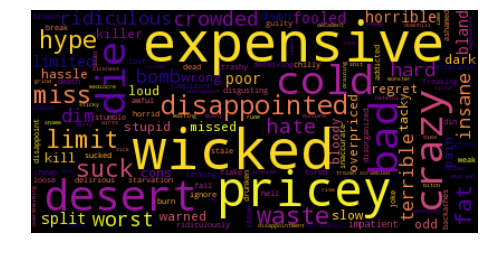

In [259]:
#negative sentiment word cloud:

wordcloud = WordCloud(max_font_size=50, colormap="plasma").generate(list_n)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This word cloud tells us that many people dislike the prices at Bacchanal.  However, the other words are quite vague.  Also, one of the most common negative words is "wicked" but it actually refers to "Wicked Spoon", a big competitor.  Perhaps getting the frequencies of bigrams rather than individual words would yield better results.

(-0.5, 399.5, 199.5, -0.5)

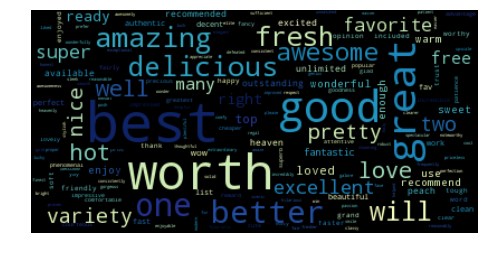

In [245]:
#positive sentiment word cloud:

wordcloud = WordCloud(max_font_size=50, colormap="YlGnBu").generate(list_p)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Merge aggregated tip and checkin datasets to master df

In [218]:
#merge checkin aggregated df above with the master df:
mdf2 = mdf.merge(checkin1, left_on = "business_id", right_on = "business_id")

In [219]:
mdf3 = mdf2.merge(tips, left_on = "business_id", right_on = "business_id")

In [220]:
#Create a dataframe with only restaurants:
dfr= mdf3[mdf3['Restaurants_dum'] == 1]
len(dfr)

699629

In [221]:
dfr.info()

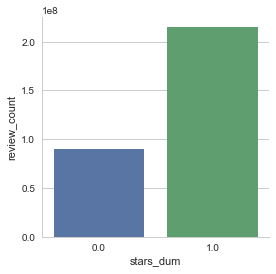

In [223]:
# vizualization of review count for high and low ratings
df_star_reviewcount= dfr.groupby(['stars_dum'], as_index=False).agg({'review_count':'sum'})
sns.factorplot(x='stars_dum',y='review_count', data=df_star_reviewcount, kind='bar')

## Validate finding with Machine Learning

In [279]:
#import modules

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [280]:
#create dataframe specifically for the decision tree (because we don't need to 
#include a lot of the columns as X variables, we can only use columns with numeric values):
dfr2 = dfr[["review_count", "Parking", "is_open","BusinessAcceptsCreditCards","Alcohol","DogsAllowed","BikeParking",\
           "stars_dum","checkins"]]

#Make X & Y
X=dfr2.drop('stars_dum',axis=1)
Y =dfr2['stars_dum']

dt = tree.DecisionTreeClassifier(max_depth=3)

dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

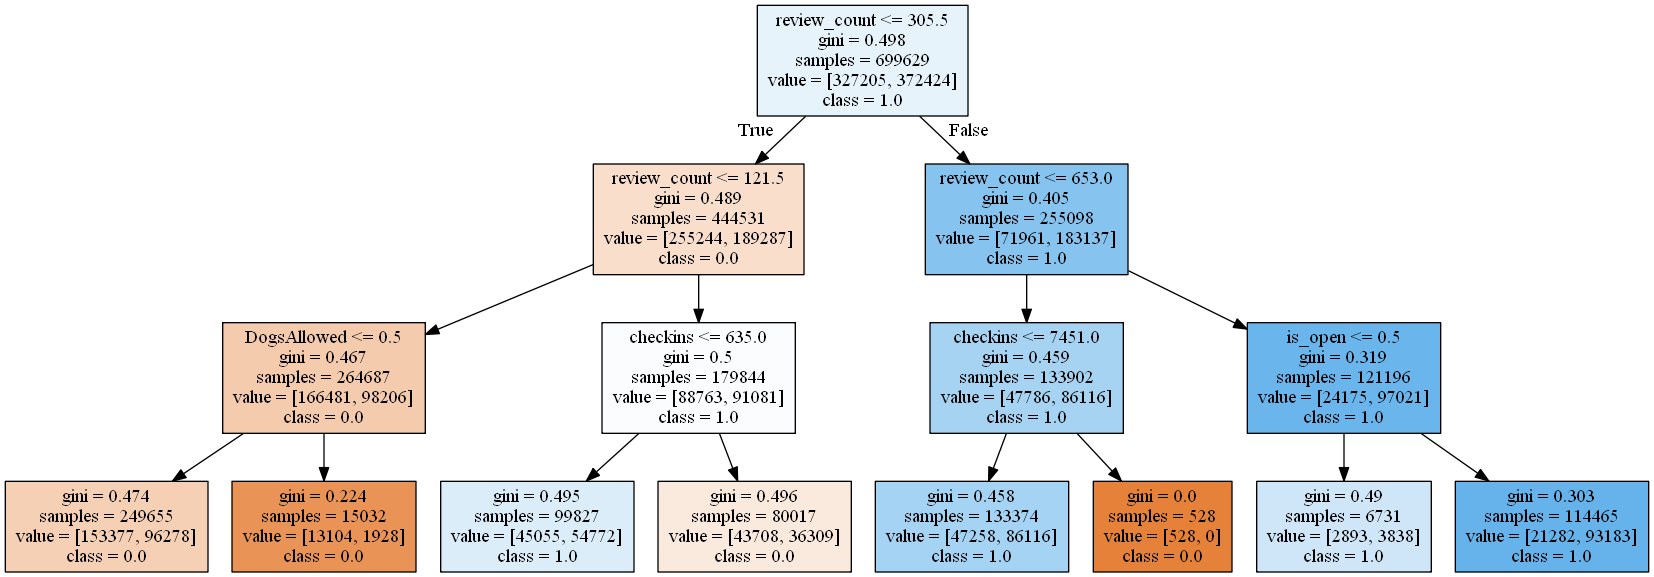

In [281]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Interpreting the tree

1. In general, the number of reviews and checkins are the most important factors for a restaurant's rating.

2. Surprisingly, for restaurants with a low number of reviews, Dogs Allowed is an important factor for whether they have a high or lower rating.

# Part IV: User Activity on Yelp

In [ ]:
tips.head(3)

gbt = tips[["date", "text"]].groupby("date", as_index = False).count()
gbt

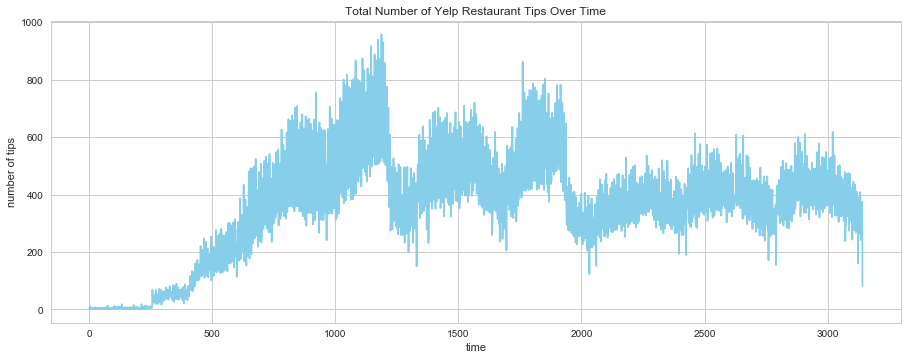

In [263]:
#total number of restaurant tips on Yelp over time:
plt.figure(figsize=(15.24, 5.56))
plt.ylabel('number of tips')
plt.xlabel('time')
plt.title("Total Number of Yelp Restaurant Tips Over Time")
plt.plot(gbt["text"], color='skyblue')
plt.show()

The total number of restaurant tips over time, shown by the time series plot above, can be a proxy for Yelp user activity over time.  This is useful for Yelp in tracking high-level customer engagement over the years.

In [ ]:
#identify which years saw big drops in user tip numbers

gbt.loc[1150:1250]

# Part V: Conclusion & Ideas for Further Analysis

Restaurants are the most highly reviewed type of business and not surprisingly, those in major metropolitan areas are the most popular.  It's important to note that this dataset only covers some, not nearly all, of the metropolitan areas in the selected countries. That's why cities like SF and New York are not included.

Individual restaurants can use Yelp data to determine which hours of the day are peak hours, based on when customers leave tips on Yelp.  The decision tree also suggests the most important factors in getting more business reviews, which is useful because more reviews means more visibility and popularity.

**For further analysis:**<br>
This project didn't leverage the Reviews dataset due to limited computer memory.  However, running text analytics with the reviews would provide much more specific suggestions to restaurants on how they can improve their business.  It would also provide useful customer engagement information to Yelp.

The word clouds could also be improved by using bigram frequencies instead of individual words.  This would provide more context for the more vague words.